# Paquetes

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

In [199]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# Datos

In [200]:
commodities_yahoo = {
    "USDPEN=X": "USDPEN",
    "HG=F": "Cobre",
    "GC=F": "Oro",
    "SI=F": "Plata",
    "CL=F": "Petróleo WTI"
}

- 🔧 **Cobre (HG=F)**:

Es el principal producto de exportación del Perú.

- ➡️ **Si sube el precio del cobre**, entran más dólares al país por exportaciones.

- ➡️ Esto **fortalece el sol** (baja el USD/PEN).

---

- **Oro (GC=F)**:

También es una gran exportación peruana y un activo refugio.

- ➡️ **Si sube el oro**, puede aumentar la entrada de divisas o reflejar incertidumbre global.

- ➡️ Puede hacer que el **tipo de cambio baje o se mantenga estable**.

---

- 🥈 **Plata (SI=F)**:

- Aunque menor en volumen, también es parte de las exportaciones mineras.

- ➡️ **Cuando sube**, ayuda a generar más dólares, pero su efecto es **menos fuerte** que el del cobre.

- 🛳️ **Brent** se comercia en Europa (ICE) y marca el precio global del crudo marino.
- 🏞️ **WTI** es más liviano y dulce, se negocia en EE.UU. (NYMEX) y refleja el mercado interno norteamericano.

In [201]:
# Selección de símbolos a consultar
tickers = list(commodities_yahoo.keys())  # Puedes cambiar el slicing si quieres más

# Descarga de datos
portafolio = yf.download(tickers=tickers, start='2025-01-01')['Close']

# Renombrar columnas usando el diccionario
portafolio.rename(columns=commodities_yahoo, inplace=True)

# Mostrar resultados
portafolio.head()

/tmp/ipython-input-201-2666837848.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  portafolio = yf.download(tickers=tickers, start='2025-01-01')['Close']
[*********************100%***********************]  5 of 5 completed


Ticker,Petróleo WTI,Oro,Cobre,Plata,USDPEN
Date,,,,,
2025-01-02,73.129997,2658.899902,3.9885,29.622000,3.669050
2025-01-03,73.959999,2645.000000,4.0395,29.806000,3.679147
2025-01-06,73.559998,2638.399902,4.1270,30.341999,3.669785
2025-01-07,74.250000,2656.699951,4.1605,30.447001,3.761000
2025-01-08,73.320000,2664.500000,4.2275,30.452000,3.768000


In [202]:
portafolio.tail()

Ticker,Petróleo WTI,Oro,Cobre,Plata,USDPEN
Date,,,,,
2025-07-21,67.199997,3401.899902,5.6105,39.101002,3.493959
2025-07-22,66.209999,3439.199951,5.6970,39.320000,3.559000
2025-07-23,65.250000,3394.100098,5.7950,39.278000,3.559000
2025-07-24,66.029999,3371.000000,5.7770,39.021000,3.553500
2025-07-25,66.589996,3359.399902,5.8165,39.220001,3.541000


# EDA

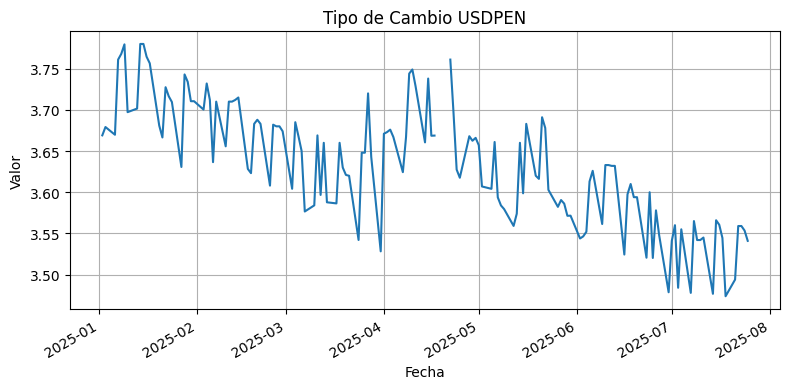

In [203]:
portafolio['USDPEN'].plot(figsize=(8, 4))

plt.title('Tipo de Cambio USDPEN')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.grid(True)
plt.tight_layout()
plt.show()

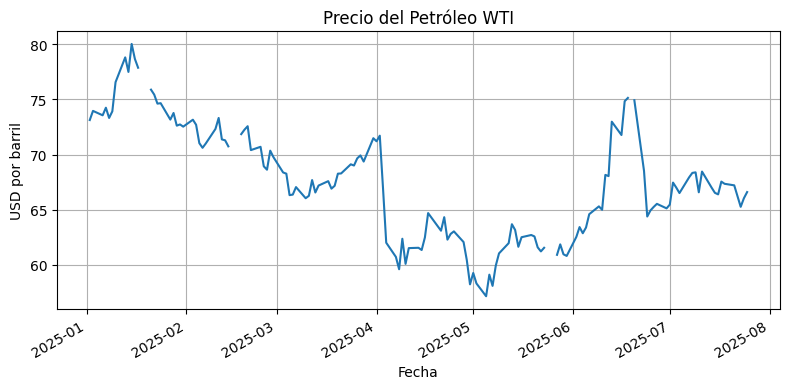

In [204]:
# Petróleo WTI
portafolio['Petróleo WTI'].plot(figsize=(8, 4))
plt.title('Precio del Petróleo WTI')
plt.xlabel('Fecha')
plt.ylabel('USD por barril')
plt.grid(True)
plt.tight_layout()
plt.show()

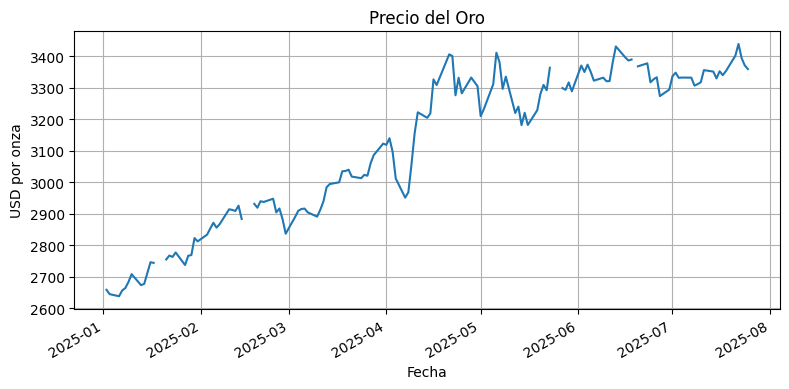

In [205]:
# Oro
portafolio['Oro'].plot(figsize=(8, 4))
plt.title('Precio del Oro')
plt.xlabel('Fecha')
plt.ylabel('USD por onza')
plt.grid(True)
plt.tight_layout()
plt.show()

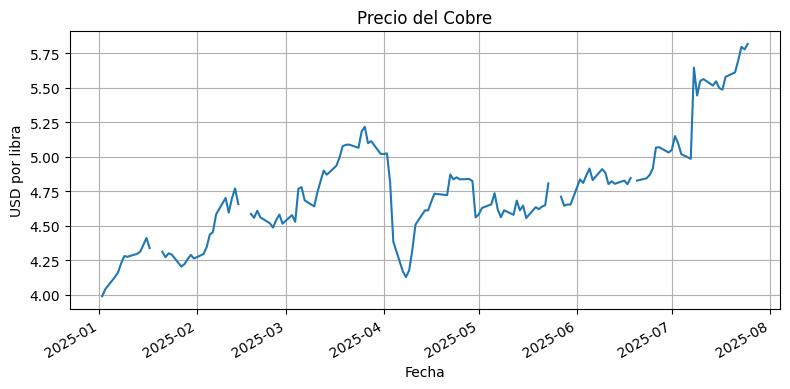

In [206]:
# Cobre
portafolio['Cobre'].plot(figsize=(8, 4))
plt.title('Precio del Cobre')
plt.xlabel('Fecha')
plt.ylabel('USD por libra')
plt.grid(True)
plt.tight_layout()
plt.show()

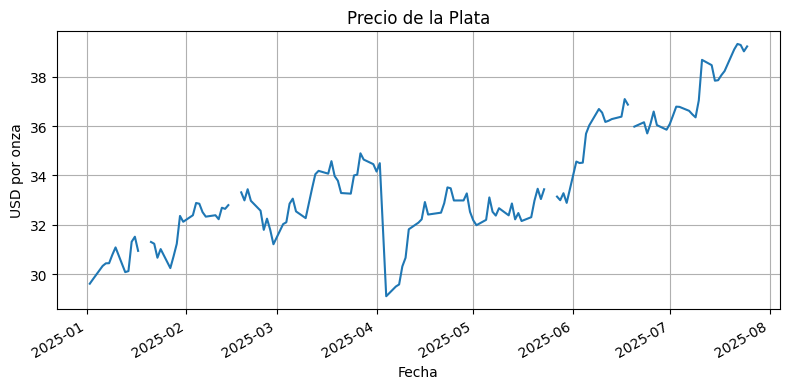

In [207]:
# Plata
portafolio['Plata'].plot(figsize=(8, 4))
plt.title('Precio de la Plata')
plt.xlabel('Fecha')
plt.ylabel('USD por onza')
plt.grid(True)
plt.tight_layout()
plt.show()

# Imputacion de datos

In [208]:
def graficar_con_akima(serie):
    # Asegurar que el índice sea datetime
    if not pd.api.types.is_datetime64_any_dtype(serie.index):
        serie.index = pd.to_datetime(serie.index)

    # Resampleo diario sin rellenar
    serie_diaria = serie.resample('D').asfreq()

    # Marcar datos reales (no nulos en la serie resampleada)
    reales = serie_diaria.notna()

    # Interpolación Akima
    serie_interp = serie_diaria.interpolate(method='akima')

    # Título dinámico
    nombre = serie.name if serie.name is not None else "Serie"

    # Graficar
    plt.figure(figsize=(12, 5))
    plt.plot(serie_interp.index, serie_interp, color='black', label='Interpolación Akima')
    plt.scatter(serie_interp.index[reales], serie_interp[reales], color='blue', label='Valor real')
    plt.scatter(serie_interp.index[~reales], serie_interp[~reales], color='red', label='Imputado')

    plt.title(f'Interpolación Akima - {nombre}')
    plt.xlabel('Fecha')
    plt.ylabel('Valor')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

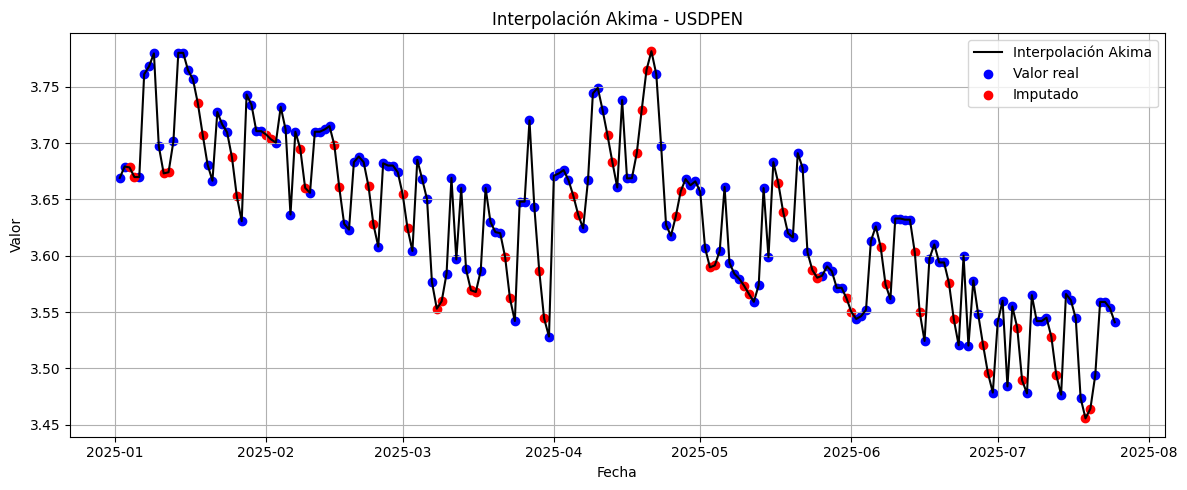

In [209]:
graficar_con_akima(portafolio['USDPEN'])

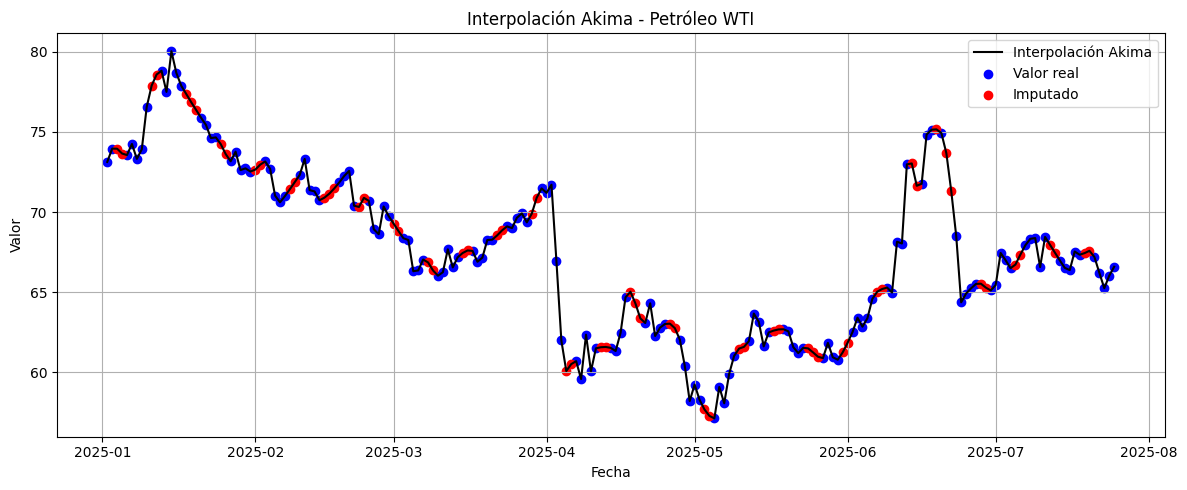

In [210]:
graficar_con_akima(portafolio['Petróleo WTI'])

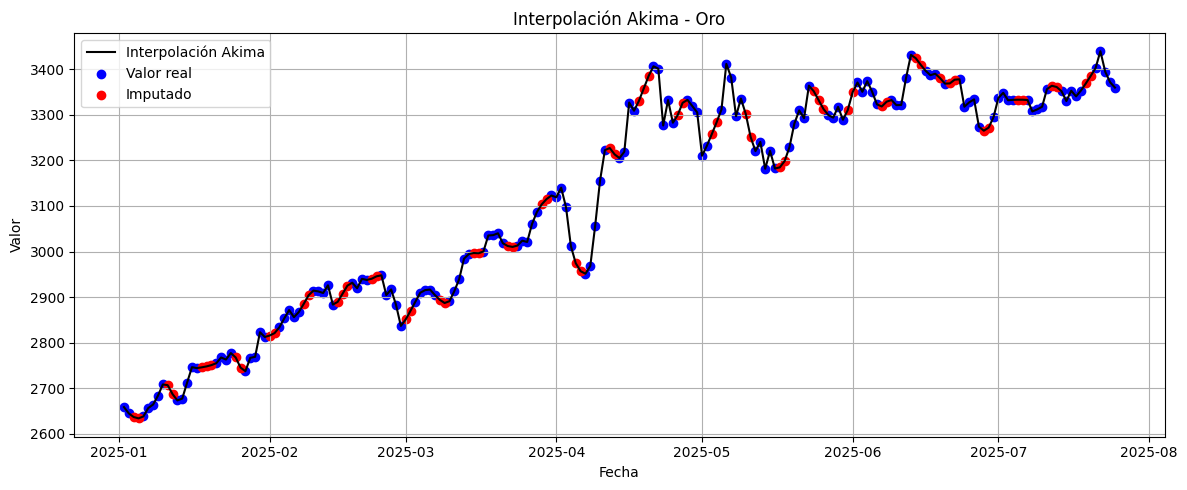

In [211]:
graficar_con_akima(portafolio['Oro'])

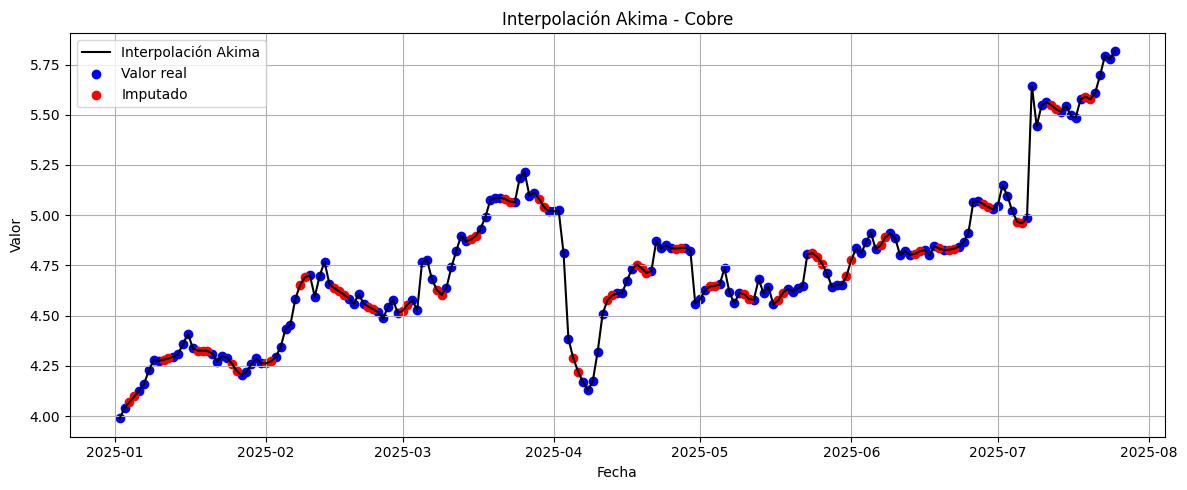

In [212]:
graficar_con_akima(portafolio['Cobre'])

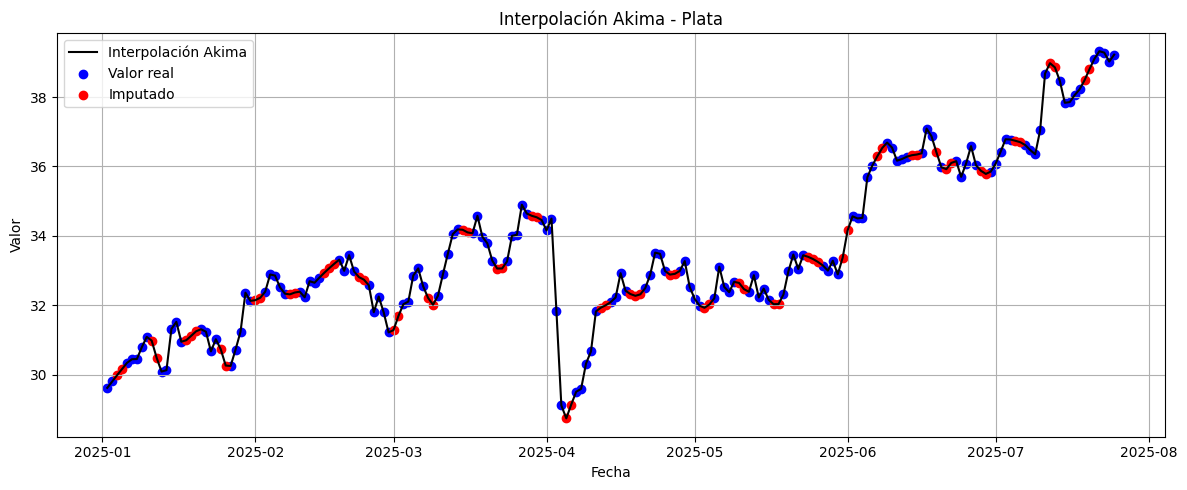

In [213]:
graficar_con_akima(portafolio['Plata'])

In [214]:
portafolio_akima = portafolio.resample('D').interpolate(method='akima').dropna()
portafolio_akima.head()

Ticker,Petróleo WTI,Oro,Cobre,Plata,USDPEN
Date,,,,,
2025-01-02,73.129997,2658.899902,3.988500,29.622000,3.669050
2025-01-03,73.959999,2645.000000,4.039500,29.806000,3.679147
2025-01-04,73.955738,2637.088529,4.069894,29.987706,3.678335
2025-01-05,73.655526,2634.142869,4.097877,30.166096,3.669794
2025-01-06,73.559998,2638.399902,4.127000,30.341999,3.669785


# Correlogramas

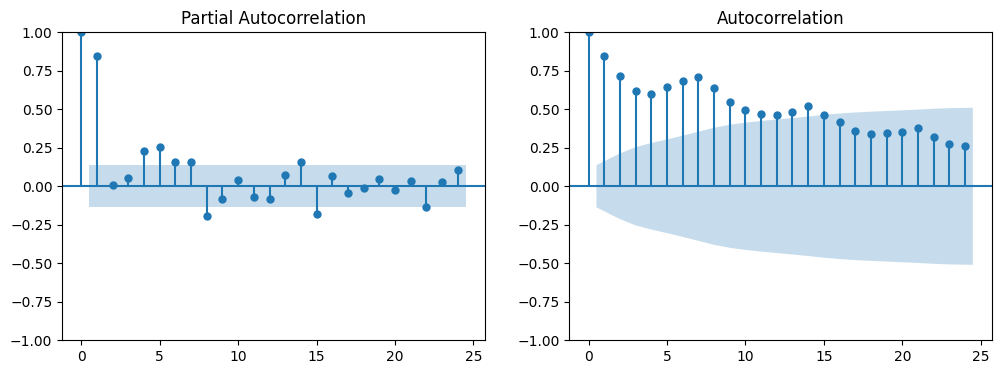

In [215]:
fig,ax=plt.subplots(1,2,figsize=(12,4))
plot_pacf(portafolio_akima['USDPEN'],ax=ax[0])
plot_acf(portafolio_akima['USDPEN'],ax=ax[1])
plt.show()

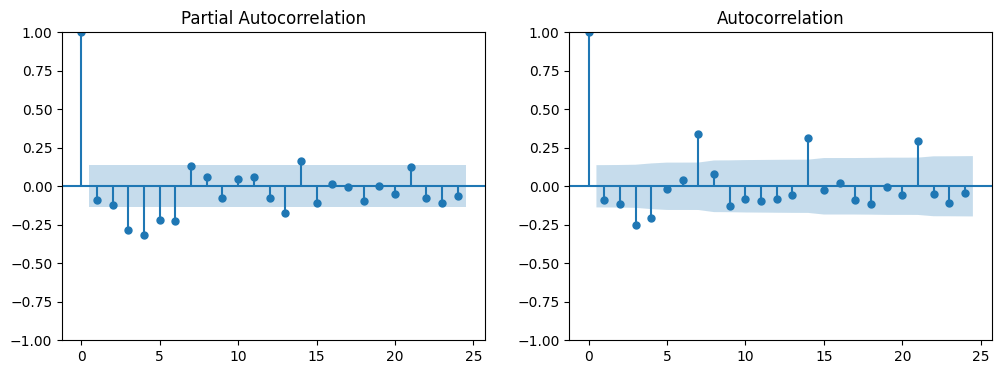

In [216]:
fig,ax=plt.subplots(1,2,figsize=(12,4))
plot_pacf(portafolio_akima['USDPEN'].diff().dropna(),ax=ax[0])
plot_acf(portafolio_akima['USDPEN'].diff().dropna(),ax=ax[1])
plt.show()

# Correlacion Cruzada

In [217]:
def graficar_correlacion_cruzada(serie_objetivo, serie_explicativa, max_lag=25):
    # Asegurar nombres para el título
    nombre_y = serie_objetivo.name if serie_objetivo.name else "Serie Y"
    nombre_x = serie_explicativa.name if serie_explicativa.name else "Serie X"

    # Eliminar nulos
    y = serie_objetivo.dropna()
    x = serie_explicativa.dropna()

    # Alinear por fecha
    y, x = y.align(x, join='inner')

    # Calcular correlación cruzada
    lags = np.arange(0, max_lag + 1)
    correlaciones = [np.abs(y.corr(x.shift(lag))) for lag in lags]

    # Gráfico
    plt.figure(figsize=(8, 4))
    plt.stem(lags, correlaciones)  # ← sin use_line_collection
    plt.axhline(0, color='black', linewidth=1)
    plt.title(f'Correlación cruzada: {nombre_y} vs {nombre_x}')
    plt.xlabel(f'Desfase de {nombre_x} (días)')
    plt.ylabel('Correlación')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

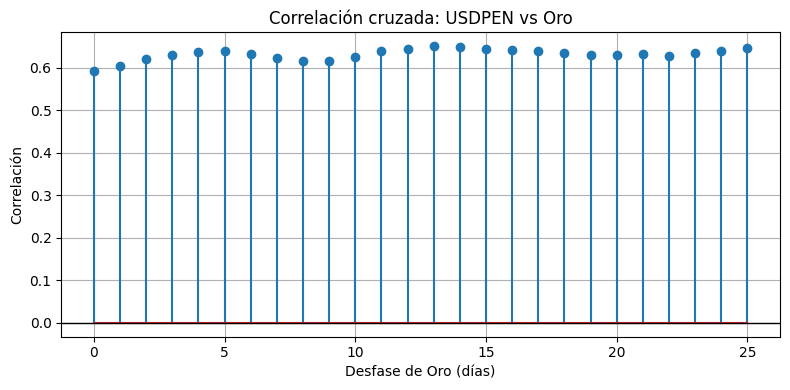

In [218]:
graficar_correlacion_cruzada(portafolio_akima['USDPEN'],portafolio_akima['Oro'])

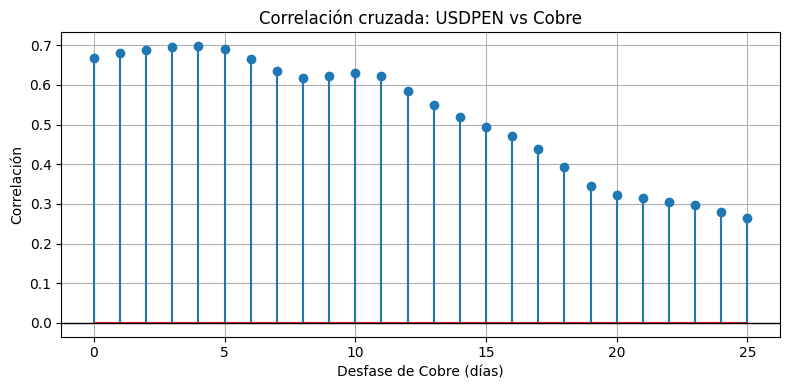

In [219]:
graficar_correlacion_cruzada(portafolio_akima['USDPEN'],portafolio_akima['Cobre'])

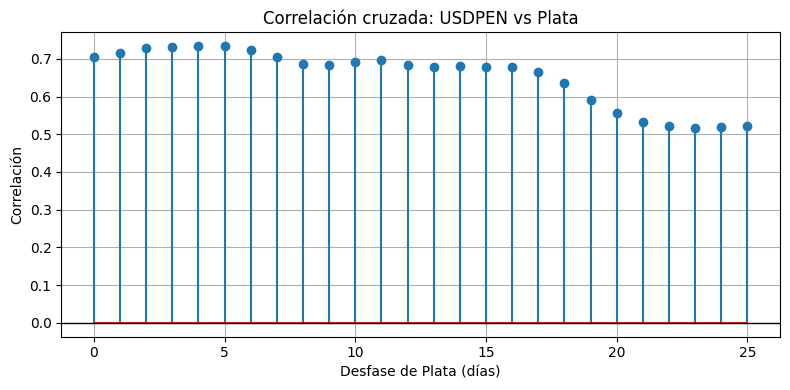

In [220]:
graficar_correlacion_cruzada(portafolio_akima['USDPEN'],portafolio_akima['Plata'])

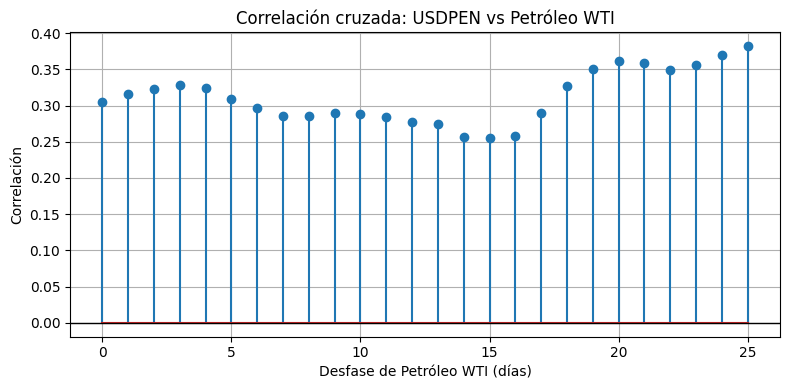

In [221]:
graficar_correlacion_cruzada(portafolio_akima['USDPEN'],portafolio_akima['Petróleo WTI'])

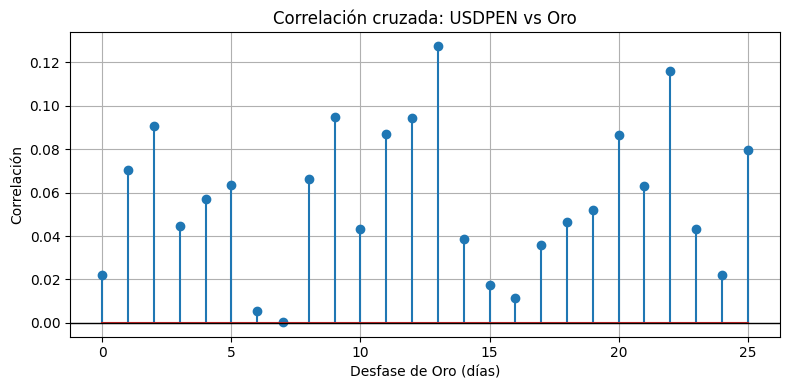

In [222]:
graficar_correlacion_cruzada(portafolio_akima['USDPEN'].diff(),portafolio_akima['Oro'].diff())

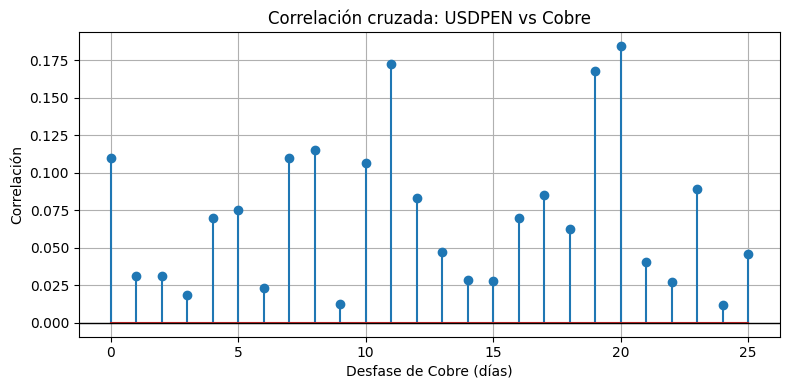

In [223]:
graficar_correlacion_cruzada(portafolio_akima['USDPEN'].diff(),portafolio_akima['Cobre'].diff())

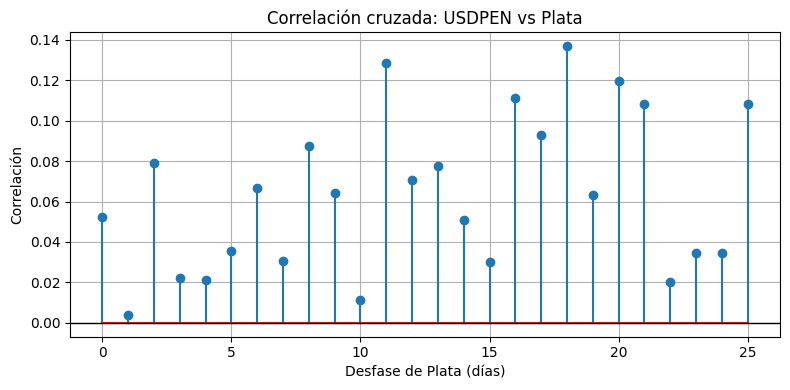

In [224]:
graficar_correlacion_cruzada(portafolio_akima['USDPEN'].diff(),portafolio_akima['Plata'].diff())

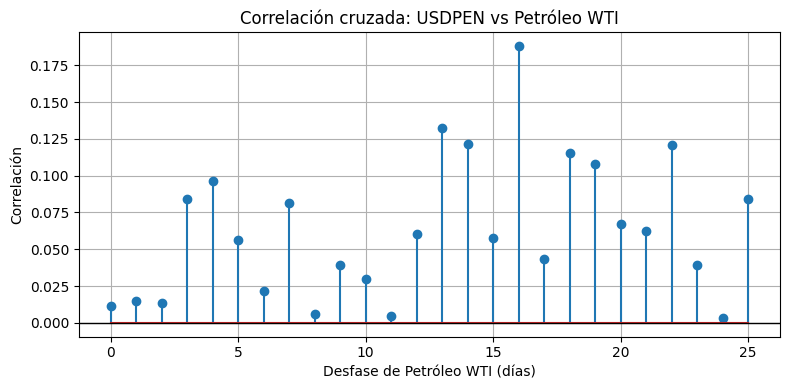

In [225]:
graficar_correlacion_cruzada(portafolio_akima['USDPEN'].diff(),portafolio_akima['Petróleo WTI'].diff())

# Modelo Sarima

In [226]:
sarima = SARIMAX(portafolio_akima['USDPEN'],order=(1,1,1),seasonal_order=(1,1,1,7)).fit()

In [227]:
print(sarima.summary())

                                     SARIMAX Results                                     
Dep. Variable:                            USDPEN   No. Observations:                  205
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood                 389.527
Date:                           Fri, 25 Jul 2025   AIC                           -769.055
Time:                                   06:32:00   BIC                           -752.639
Sample:                               01-02-2025   HQIC                          -762.409
                                    - 07-25-2025                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6111      0.082      7.490      0.000       0.451       0.771
ma.L1         -0.9162      0.041    -22.333

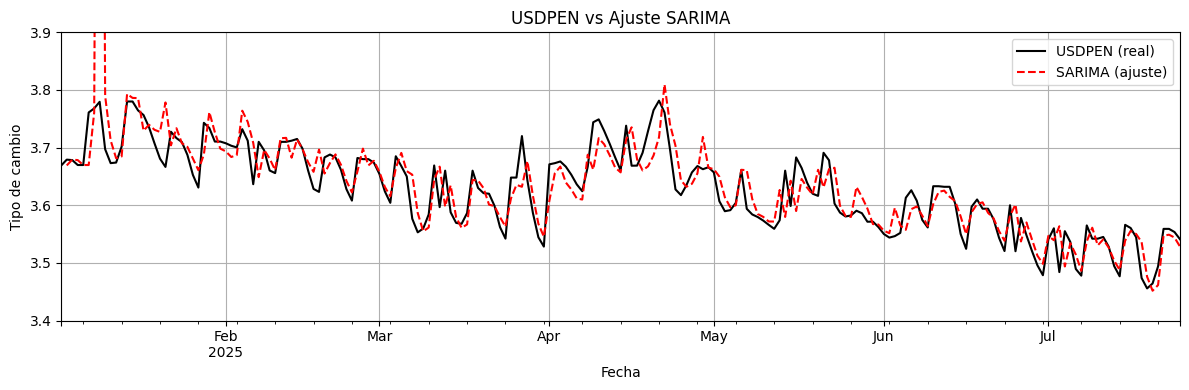

In [228]:
plt.figure(figsize=(12, 4))
portafolio_akima['USDPEN'].plot(label='USDPEN (real)', ylim=(3.4, 3.9), color='black')
sarima.fittedvalues[1:].plot(label='SARIMA (ajuste)', linestyle='--', color='red')
plt.title('USDPEN vs Ajuste SARIMA')
plt.xlabel('Fecha')
plt.ylabel('Tipo de cambio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Entrenamiento y prueba

In [229]:
n_step = 12
train = portafolio_akima['USDPEN'][:-n_step]
test = portafolio_akima['USDPEN'][-n_step:]

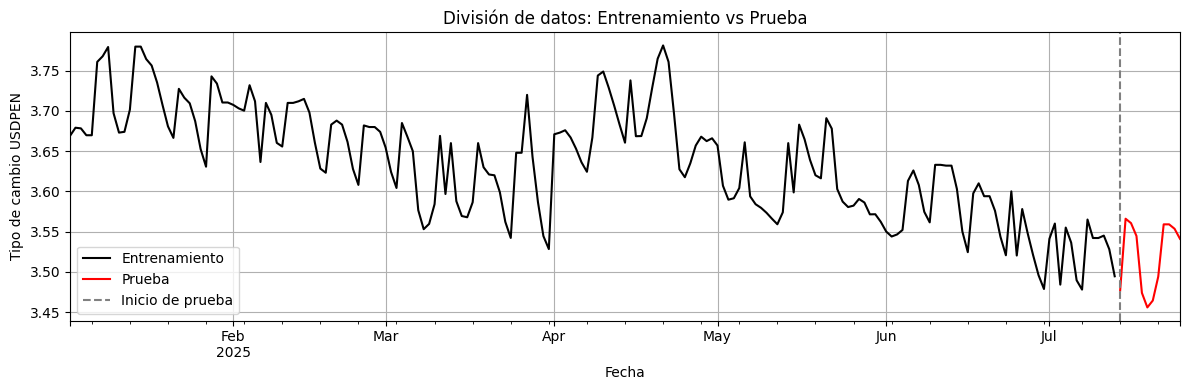

In [230]:
train.plot(label='Entrenamiento', color='black',figsize=(12, 4))
test.plot(label='Prueba', color='red')
plt.axvline(test.index[0], color='gray', linestyle='--', label='Inicio de prueba')
plt.title('División de datos: Entrenamiento vs Prueba')
plt.xlabel('Fecha')
plt.ylabel('Tipo de cambio USDPEN')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [231]:
sarima2 = SARIMAX(train,order=(1,1,1),seasonal_order=(1,1,1,7)).fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [232]:
print(sarima2.summary())

                                     SARIMAX Results                                     
Dep. Variable:                            USDPEN   No. Observations:                  193
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood                 362.542
Date:                           Fri, 25 Jul 2025   AIC                           -715.085
Time:                                   06:32:02   BIC                           -698.983
Sample:                               01-02-2025   HQIC                          -708.559
                                    - 07-13-2025                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6212      0.084      7.371      0.000       0.456       0.786
ma.L1         -0.9226      0.041    -22.260

In [233]:
forecast = sarima2.forecast(n_step)

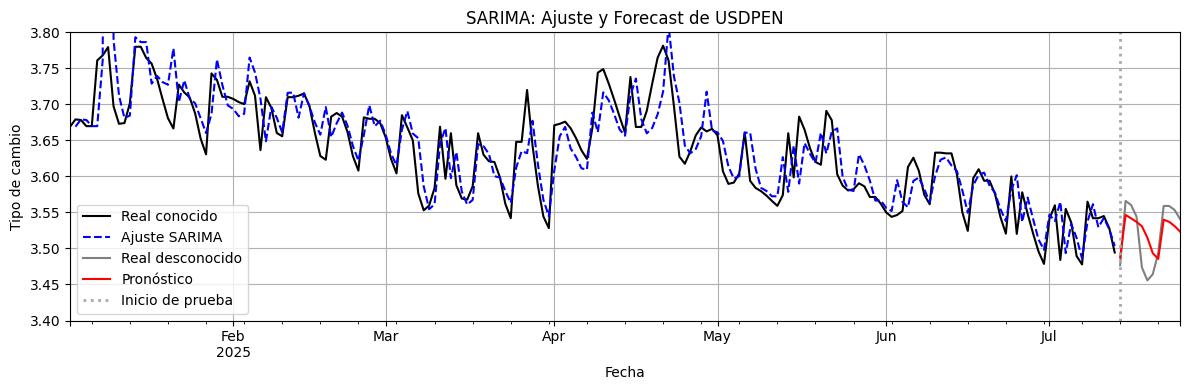

In [234]:
plt.figure(figsize=(12, 4))
train.plot(label='Real conocido', color='black')
sarima2.fittedvalues[1:].plot(label='Ajuste SARIMA', color='blue', linestyle='--')
test.plot(label='Real desconocido', color='gray')
forecast.plot(label='Pronóstico', color='red')
plt.axvline(test.index[0], color='darkgray', linestyle=':', linewidth=2, label='Inicio de prueba')
plt.title('SARIMA: Ajuste y Forecast de USDPEN')
plt.xlabel('Fecha')
plt.ylabel('Tipo de cambio')
plt.ylim(3.4, 3.8)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Modelo Sarimax

In [235]:
lag_oro = 13
lag_plata = lag_cobre = 11
lag_petroleo = 16

In [236]:
portafolio_akima['lag_oro'] = portafolio_akima['Oro'].shift(lag_oro)
portafolio_akima['lag_plata'] = portafolio_akima['Plata'].shift(lag_plata)
portafolio_akima['lag_cobre'] = portafolio_akima['Cobre'].shift(lag_cobre)
portafolio_akima['lag_petroleo'] = portafolio_akima['Petróleo WTI'].shift(lag_petroleo)

In [237]:
portafolio_akima.dropna(inplace=True)

In [238]:
exog = ['lag_oro','lag_plata','lag_cobre','lag_petroleo']

In [239]:
y_train = portafolio_akima['USDPEN'][:-n_step]
y_test = portafolio_akima['USDPEN'][-n_step:]
x_train = portafolio_akima[exog][:-n_step]
x_test = portafolio_akima[exog][-n_step:]

In [255]:
sarimax = SARIMAX(y_train,order=(1,1,1),seasonal_order=(1,1,1,7),exog=x_train).fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [256]:
print(sarimax.summary())

                                     SARIMAX Results                                     
Dep. Variable:                            USDPEN   No. Observations:                  177
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood                 323.284
Date:                           Fri, 25 Jul 2025   AIC                           -628.568
Time:                                   06:34:49   BIC                           -600.399
Sample:                               01-18-2025   HQIC                          -617.136
                                    - 07-13-2025                                         
Covariance Type:                             opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
lag_oro         -0.0002   6.04e-05     -3.061      0.002      -0.000   -6.65e-05
lag_plata        0.0030      0.007   

In [257]:
forecast = sarimax.forecast(n_step,exog=x_test)

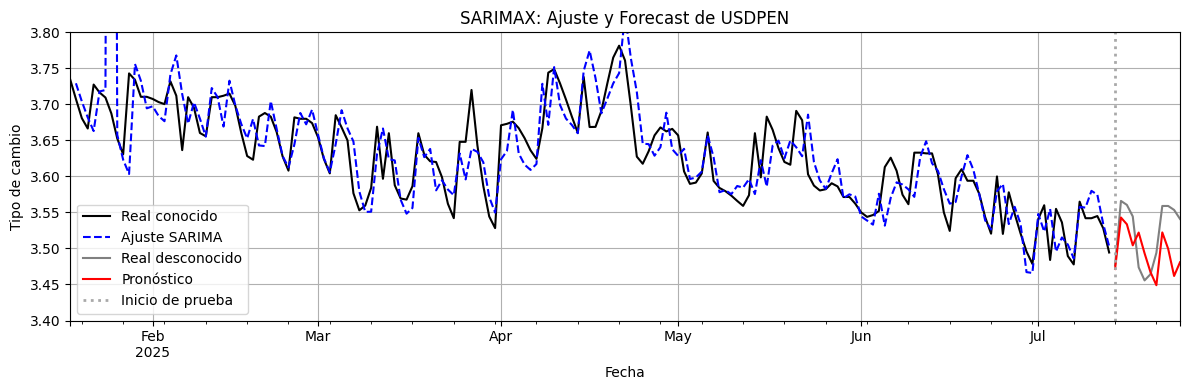

In [258]:
plt.figure(figsize=(12, 4))
y_train.plot(label='Real conocido', color='black')
sarimax.fittedvalues[1:].plot(label='Ajuste SARIMA', color='blue', linestyle='--')
y_test.plot(label='Real desconocido', color='gray')
forecast.plot(label='Pronóstico', color='red')
plt.axvline(test.index[0], color='darkgray', linestyle=':', linewidth=2, label='Inicio de prueba')
plt.title('SARIMAX: Ajuste y Forecast de USDPEN')
plt.xlabel('Fecha')
plt.ylabel('Tipo de cambio')
plt.ylim(3.4, 3.8)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

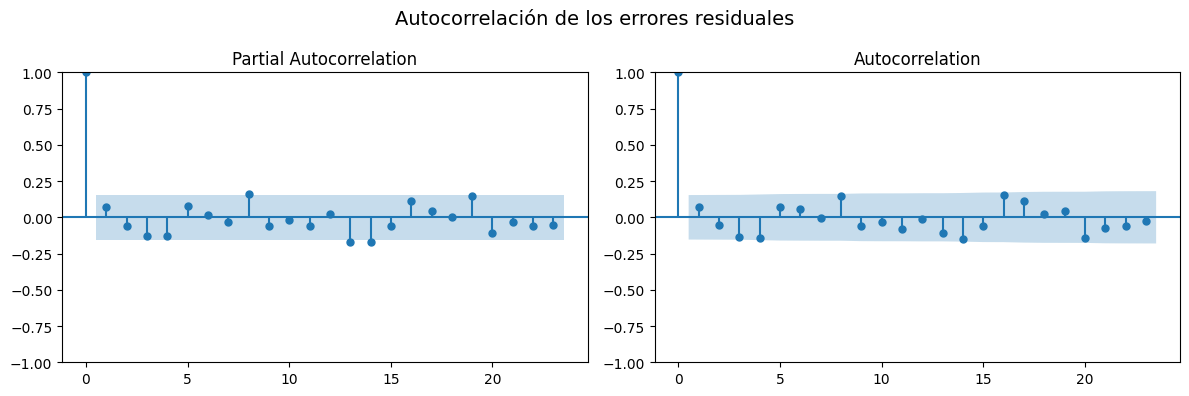

In [264]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_pacf(sarimax.resid[14:], ax=ax[0])
plot_acf(sarimax.resid[14:], ax=ax[1])
fig.suptitle("Autocorrelación de los errores residuales", fontsize=14)
plt.tight_layout()
plt.show()

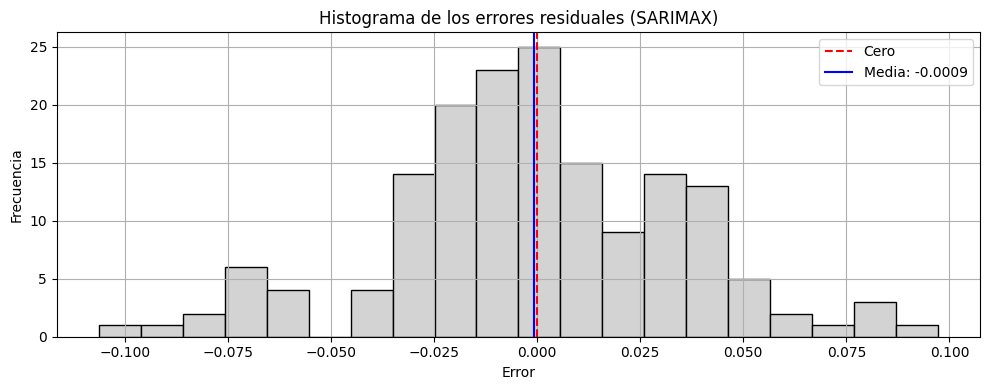

In [260]:
residuos = sarimax.resid[14:]

plt.figure(figsize=(10, 4))
plt.hist(residuos, bins=20, color='lightgray', edgecolor='black')

# Líneas de referencia
plt.axvline(0, color='red', linestyle='--', label='Cero')
plt.axvline(residuos.mean(), color='blue', linestyle='-', label=f'Media: {residuos.mean():.4f}')

# Estética
plt.title('Histograma de los errores residuales (SARIMAX)')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()